<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - Neural Network <br>
<font color=696880 size=4>
    Javad Hezareh 
    
    
____


### Full Name : MohammadMehdi Zare
### Student Number : 98100431
___

# Problem
In this assignment our goal is to develop a framework for simple neural networks, multi layer perceptrons. We are going to use only `numpy` and no other packages to build our own classes and network.

# Setup

In [1]:
###################################
#  Do Not Add any other packages  #
###################################

import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import tqdm
import copy
from utils import *

plt.style.use('ggplot')

# Section 1: Modules implementation (65 Points)
We are going to implement required modules for a neural net. Each of this modules must implement the neccessery functions, `_forward` and `backward`. In the following parts, we will implement `LinearLayer`, `ReLU` and `SoftMax` layers.

## Layers

#### Linear Layer (10 Points)

In [2]:
class LinearLayer(Module):
    """
    A linear layer module which calculate (Wx + b).
    """

    def __init__(self, dim_in, dim_out, initializer, reg, alpha):
        """
        Args:
            - dim_in: input dimension,
            - dim_out: output dimension,
            - initializer: a function which get (dim_in, dim_out) and initialize
                a [dim_in x dim_out] matrix,
            - reg: L2-regularization flag
            - alpha: L2-regularization coefficient
        """
        self.dim_in = dim_in
        self.dim_out = dim_out
        self.alpha=alpha
        self.reg=reg
        self.params = {
            #########################################
            ##          Initialize parameters      ##
            ##              Your Code              ##
            #########################################
            'W':initializer( dim_in , dim_out ),
            'b': np.zeros(dim_out),
            
        }
        self.grads = dict()
        self.cache = dict()

    def _forward(self, x):
        """
        linear forward function, calculate Wx+b for a batch of data

        Args:
            x : a batch of data

        Note:
            you need to store some values in cache to be able to
            calculate backward path.
        """
        #########################################
        ##              Your Code              ##
        #########################################
        
        y = np.dot(x , self.params["W"].T ) + self.params["b"]
        self.cache["x"]=x
        return y

    def backward(self, upstream):
        """
        get upstream gradient and returns downstream gradient

        Args:
            upstream : upstream gradient of loss w.r.t module output

        Note:
            you need to calculate gradient of loss w.r.t module input
            and parameters and store them in grads.
        """
        #########################################
        ##              Your Code              ##
        #########################################
    
        grad_b = upstream.sum(axis=0)
        grad_w = np.dot(upstream.T, self.cache['x'])
        grad_x = np.dot(upstream,self.params["W"])
        grad_reg = 2*self.alpha* self.params["W"]

        
        
        self.grads = {
            'W': grad_w,
            'b': grad_b,
            'x': grad_x,
            'reg': grad_reg
        }


In [3]:
# sanity check, output must be from o(e-5)
initializer = lambda x, y: np.random.normal(size=(y, x))
linear = LinearLayer(5, 10, initializer, reg=True, alpha=1)
check_gradient_linear(linear, h=0.00001)

Gradient of loss w.r.t output:
[[0.82955535 0.21114721 0.29056745 0.76196253 0.48381119 0.26313752
  0.17058744 0.68924104 0.14521547 0.36108282]
 [0.17969557 0.61131998 0.90547691 0.09465278 0.04351438 0.82898441
  0.53347611 0.25746229 0.83709683 0.91589097]
 [0.95338569 0.53886974 0.68147718 0.14543317 0.36605854 0.25725115
  0.64065521 0.99467217 0.84735271 0.6116583 ]
 [0.6585274  0.09264464 0.55180917 0.84839143 0.74920247 0.66146217
  0.48228694 0.96546312 0.48159736 0.23890255]
 [0.62490249 0.71391215 0.39654666 0.08349731 0.25206548 0.14235356
  0.84943899 0.30579129 0.18025764 0.72632517]
 [0.07006783 0.77688796 0.90754448 0.97929669 0.15398316 0.39885902
  0.85437948 0.42579468 0.34963434 0.91473698]
 [0.92071169 0.33599422 0.31872931 0.63541889 0.58434891 0.17077758
  0.11395208 0.59733395 0.64102327 0.2976854 ]
 [0.36232214 0.94163488 0.10551311 0.04220206 0.55321597 0.03134844
  0.82945429 0.71557495 0.4421455  0.89943093]
 [0.15358404 0.01888662 0.93738637 0.70363497 0.2

#### ReLU Layer (5 Points)

In [4]:
class ReLU(Module):
    """
    Rectified Linear Unit function
    """

    def __init__(self):
        self.cache = dict()
        self.grads = dict()

    def _forward(self, x):
        """
        applies relu function on x

        Args:
            x : a batch of data

        Returns:
            y : relu of input
        """
        #########################################
        ##              Your Code              ##
        #########################################
        y = np.maximum(0, x)
        self.cache["y"]=y
        return y

    def backward(self, upstream):
        """
        calculate and store gradient of loss w.r.t module input

        Args:
            upstream : gradient of loss w.r.t modele output
        """
        #########################################
        ##              Your Code              ##
        #########################################
        a=self.cache["y"]
        grad_x = upstream*(a>0).astype(a.dtype)

        self.grads['x'] = grad_x


In [5]:
# sanity check - output must be from o(e-8)
relu = ReLU()
check_gradient_relu(relu)

Gradient of loss w.r.t output:
[[0.0584373  0.88325126 0.26846461 0.89464548 0.50320908]
 [0.09177401 0.38804983 0.72265477 0.53096799 0.3455338 ]
 [0.24378035 0.21950653 0.93640053 0.87820106 0.33644566]
 [0.87531923 0.36254974 0.54245228 0.95475059 0.96677731]
 [0.52121319 0.0189511  0.32733035 0.67793154 0.20010495]
 [0.7436883  0.46844046 0.26309046 0.4595906  0.83244012]
 [0.62944357 0.72287473 0.73348264 0.21539666 0.77413853]
 [0.20357441 0.51746258 0.75884962 0.6687436  0.51406511]
 [0.71992879 0.77988594 0.72842911 0.12522849 0.8795159 ]
 [0.64932805 0.24568954 0.25430494 0.42654584 0.25253977]]
Gradient of loss w.r.t input:
[[0.         0.88325126 0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.93640053 0.         0.33644566]
 [0.87531923 0.36254974 0.         0.         0.96677731]
 [0.52121319 0.0189511  0.         0.67793154 0.20010495]
 [0.         0.46844046 0.26309046 0.         0.        ]
 [0.629443

#### SoftMax Layer (15 Points)

We could have a layer that calculate softmax for us. In other word, for input $x\in\mathcal{R}^N$ it would return $y\in\mathcal{R}^n$ where $y_i = \frac{e^{x_i}}{\sum e^{x_i}}$. But this method is not numerical stable because $e^{x_i}$ in this formulation can get very large easly and return `nan`. Instead of that we will implement a logarithmic version of softmax which instead of calculating $\frac{e^{x_i}}{\sum e^{x_i}}$, we will calculate $\log\left(\frac{e^{x_i}}{\sum e^{x_i}}\right) = x_i - \log\sum e^{x_i}$. In order to calculate second term you can use `np.logaddexp` but this function only works on two input. For more than two input, fill in the following function to be able to calculate log sum exp of an array of shape (b,n). `axis=1` means sum over columns and `axis=0` sum over rows.

In [6]:
import math
def logsumexp(array, axis=1):
    """
    calculate log(sum(exp(array))) using np.logaddexp

    Args:
        array : input array
        axis : reduce axis, 1 means columns and 0 means rows
    """
    
    assert len(array) >= 2  
    
    res=np.zeros((array.shape))
    for i in range (array.shape[0]):
        y=np.logaddexp(array[i,0],array[i,1])
        for j in range(2,array.shape[1]):
            y=np.logaddexp(y,array[i,j])
        res[i,:]=y;

    return res

In [7]:
class LogSoftMax(Module):
    def __init__(self):
        self.cache = dict()
        self.grads = dict()

    def _forward(self, x):
        """
        get x and calculate softmax of that.

        Args:
            x : batch of data with shape (b,m)

        Returns:
            y : log softmax of x with shape (b,m)
        """
        #########################################
        ##              Your Code              ##
        #########################################
#         print("x is: " , x)
        lse = logsumexp(x, axis=0);
        temp=np.ones_like(x)
        for i in range(len(lse)):
            temp[i]=lse[i]*temp[i]
#         print("temp is: " , temp)
        y=x-temp
#         y=x - lse
        self.cache["y"]=y
        self.cache["x"]=x
#         print("y is :" , y)
        return y

    def backward(self, upstream):
        """
        calculate gradient of loss w.r.t module input and save that in grads.

        Args:
            upstream : gradient of loss w.r.t module output with sahpe (b,m)
        """
        #########################################
        ##              Your Code              ##
        #########################################
        softmax=np.exp(self.cache['y'])
        s_dim=softmax.shape[1]
        grad_x=np.zeros_like(upstream)
        for b in range(self.cache['y'].shape[0]):
            jac=np.eye(s_dim) - softmax[b,np.newaxis]
            grad_x[b] = np.dot(upstream[b], jac)

        self.grads['x'] = grad_x


In [8]:

sm = LogSoftMax()
check_gradient_softmax(sm)

Gradient of loss w.r.t output:
[[0.1630331  0.13488387 0.64710355 0.267412   0.38909318]
 [0.17558247 0.28087961 0.28324271 0.94903849 0.49365313]
 [0.66110396 0.48183119 0.81942941 0.72267524 0.05972474]
 [0.23687506 0.58419898 0.63517021 0.34454597 0.22345524]
 [0.88441083 0.96840966 0.22989379 0.11408372 0.45871137]
 [0.00832097 0.74025973 0.43923602 0.0739073  0.96269913]
 [0.17190485 0.1383921  0.6479173  0.88009471 0.35911365]
 [0.42453736 0.08015594 0.24649505 0.0371008  0.95956135]
 [0.14149331 0.25348514 0.93081829 0.36581357 0.52428419]
 [0.23683714 0.9252707  0.18926396 0.4527474  0.47814843]]
Gradient of loss w.r.t input:
[[-0.25543381 -0.14106689  0.41398    -0.12588516  0.10840584]
 [-0.20376161 -0.15868754 -0.08018071  0.43744502  0.00518484]
 [ 0.11956483  0.16874444  0.31243645 -0.01058303 -0.59016269]
 [-0.09121993  0.20407432  0.31101343  0.00085981 -0.42472763]
 [ 0.28037124  0.35101985 -0.11664377 -0.4851247  -0.02962261]
 [-0.29306479  0.21679663 -0.12605471 -0.46

## Model (10 Points)
We need a model class which gathers our layers togather and performs forward and backward on all of them.

In [9]:
class MLPModel(Module):
    """
    A multilayer neural network model
    """

    def __init__(self, layers):
        """
        Args:
            layers : list of model layers
        """
        self.layers = layers

    def _forward(self, x):
        """
        Perform forward on x

        Args:
            x : a batch of data

        Returns:
            o : model output
        """
        #########################################
        ##              Your Code              ##
        #########################################
        current_x=x
        for i in range(len(self.layers)):
            current_layer=self.layers[i]
            current_x=current_layer._forward(current_x)
        return current_x
    def backward(self, upstream):
        """
        Perform backward path on whole model

        Args:
            upstream : gradient of loss w.r.t model output
        """
        #########################################
        ##              Your Code              ##
        #########################################
        
        current_upstream=upstream
        for layer in reversed(self.layers):
            layer.backward(current_upstream)
            current_upstream=layer.grads["x"]

    def get_parameters(self):
        """
        Returns:
            parametric_layers : all layers of model which have parameter
        """
        layers=[]
        for layer in self.layers:
            if(hasattr(layer,"params")):
                layers.append(layer)
        return layers

## Loss functions (10 Points)
We need to implement loss functions to be able to train our network. We will implement CrossEntropy loss function. But notice that we have implemented `LogSoftMax` in logarithmic way so input of the following class will be logarithm of probabilities. 

In [10]:
class CrossEntropyLoss(Module):
    def __init__(self, mean=False):
        self.mean = mean
        self.cache = dict()
        self.grads = dict()

    def _forward(self, logprobs, targets):
        """
        Calculate cross entropy of inputs.

        Args:
            probs : matrix of probabilities with shape (b,n)
            targets : list of samples classes with shape (b,)

        Returns:
            y : cross entropy loss
        """
        #########################################
        ##              Your Code              ##
        #########################################
        m = targets.shape[0]
        logits_for_answers=logprobs[range(m),targets]
        y= - logits_for_answers 
        
        y= np.sum(y) / m
        self.cache['y']=y
        self.cache['logprobs']=logprobs
        self.cache['targets']=targets
        return y

    def backward(self, upstream):
        """
        Calculate gradient of loss w.r.t module input and save them in grads.

        Args:
            upstream : gradient of loss w.r.t module output (loss)
        """
        #########################################
        ##              Your Code              ##
        #########################################

        grad_scores = np.zeros((self.cache['logprobs'].shape))
        m = self.cache['targets'].shape[0]
        grad_scores[range(m),self.cache['targets']]=-1/(m)
        
        self.grads['x'] = grad_scores

In [11]:
# check gradient, output must be from o(e-10)
ce = CrossEntropyLoss()
check_gradient_ce(ce, h=0.0001)

Gradient of loss w.r.t output:
1
Gradient of loss w.r.t input:
[[ 0.  -0.1  0.   0.   0. ]
 [ 0.   0.   0.  -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1]
 [-0.1  0.   0.   0.   0. ]
 [-0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.1]
 [ 0.  -0.1  0.   0.   0. ]
 [ 0.  -0.1  0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.1]]
Relative error of delta-loss:
3.327145416815998e-13


## Optimization (15 Points)

Now that we have our network and loss function, we need to update model paremeters. We can do so by using `Optimizer` class that perform updating rule on model parameters. You need to implement `sgd` and `momentum` strategy for this optimizer. Becarefull to consider regularization update for linear units that require regularization.

In [12]:
class Optimizer():
    """
    Our main optimization class.
    
    You can add arguments to _sgd and _momentum function if you need to do so, and
    pass this arguments to step function when using optimizer. Don't change __init__
    or step function.
    """

    def __init__(self, layers, strategy, lr):
        """
        save layers here in order to update their parameters later.

        Args:
            layers : model layers (those that we want to update their parameters)
            strategy : optimization strategy
            lr : learning rate
        """
        self.layers = layers
        self.strategy = strategy
        self.lr = lr
        self.strategies = {
            'sgd': self._sgd,
            'momentum': self._momentum,
        }

    def step(self, *args):
        """
        Perform updating strategy on all layers paramters.
        """
        self.strategies[self.strategy](*args)

    def _sgd(self):
        """
        Perform sgd update on all parameters of layers
        """
        #########################################
        ##              Your Code              ##
        #########################################
        
        for layer in self.layers:
            if isinstance(layer , LinearLayer):
                layer.params["W"]-=layer.grads["W"]*self.lr
                layer.params["b"]-=layer.grads["b"]*self.lr
                if layer.reg:
                    layer.params["W"]-=layer.grads["reg"]*self.lr


        
    
    def _momentum(self):
        """
        Perform momentum update on all parameters of layers
        """
        #########################################
        ##              Your Code              ##
        #########################################
        pass


# Section 2: CIFAR-10 Classification (35 Points)

Now that we can build a neural network we want to solve CIFAR-10 classification problem. This dataset consists of 60000 $32 \times 32$ coloured images in 10 classes.

## Data preparation (5 Points)

In [13]:
#################################################
##      Run this cell to download dataset      ##
##         the dataset is about 150 MB         ##
#################################################
!./cifar10_downloader.bash

'.' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
#############################################
##      Run this cell to load dataset      ##
#############################################
data = load_dataset(train_num=4000, test_num=1000)

for k in data.keys():
    print(f'{k}: {data[k].shape}')


X_train: (4000, 32, 32, 3)
Y_train: (4000,)
X_test: (1000, 32, 32, 3)
Y_test: (1000,)


In [15]:
val_index=np.random.choice(list(range(1,4000)),1200,replace=False)

In [16]:
##############################################
##      Split train set to train/val        ##
################[Your Code]###################
data["X_val"]=data["X_train"][val_index,:,: ]
data["Y_val"]=data["Y_train"][val_index ]
data["X_train"]=np.delete(data["X_train"],val_index, axis=0)
data["Y_train"]=np.delete(data["Y_train"],val_index, axis=0 )
##############################################
for k in data.keys():
    print(f'{k}: {data[k].shape}')

X_train: (2800, 32, 32, 3)
Y_train: (2800,)
X_test: (1000, 32, 32, 3)
Y_test: (1000,)
X_val: (1200, 32, 32, 3)
Y_val: (1200,)


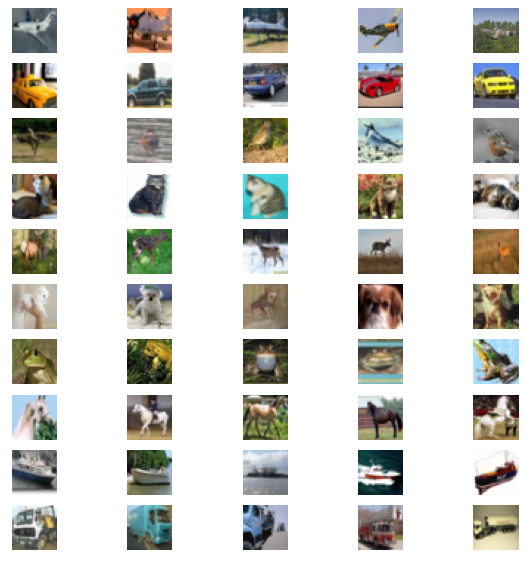

In [17]:
##################################################
##      Visualize 5 samples from each class     ##
##################[Your Code]#####################
minY=np.min(data["Y_train"])
maxY=np.max(data["Y_train"])


fig = plt.figure(figsize=(10,10))
for i in range(minY,maxY+1):
    indices=np.where(data['Y_train']==i)[0]
    for j in range(5):
        img_grid = fig.add_subplot(10, 5, (i)*5+j+1)
        img_grid.imshow(data['X_train'][indices[j]])
        img_grid.set_yticks([])
        img_grid.set_xticks([])

plt.show()

In [18]:
#####################################################
##             Normalize and flatten X             ##
####################[Your Code]######################

data["X_train_flatt"]=data["X_train"].reshape(data["X_train"].shape[0],-1)
data["X_val_flatt"]=data["X_val"].reshape(data["X_val"].shape[0],-1)
data["X_test_flatt"]=data["X_test"].reshape(data["X_test"].shape[0],-1)

mean_X=np.mean(data["X_train"])

data["X_train_flatt"]-=mean_X
data["X_val_flatt"]-=mean_X
data["X_test_flatt"]-=mean_X
data["Y_train_flatt"]=data["Y_train"]
data["Y_test_flatt"]=data["Y_test"]
data["Y_val_flatt"]=data["Y_val"]

#####################################################
for k in data.keys():
    print(f'{k}: {data[k].shape}')

X_train: (2800, 32, 32, 3)
Y_train: (2800,)
X_test: (1000, 32, 32, 3)
Y_test: (1000,)
X_val: (1200, 32, 32, 3)
Y_val: (1200,)
X_train_flatt: (2800, 3072)
X_val_flatt: (1200, 3072)
X_test_flatt: (1000, 3072)
Y_train_flatt: (2800,)
Y_test_flatt: (1000,)
Y_val_flatt: (1200,)


## Train and Test Model (25 Points)

### Batch Sampler
We need to sample bathces from our dataset to train model. Complete the following class to have a random sampler.

In [19]:
class RandomSampler(object):
    def __init__(self, batch_size, dataset, type):
        """
        Args:
            batch_size : sampler batch size
            dataset : gh', 'test', 'val'}
        """
        self.batch_size = batch_size
        self.dataset = dataset
        self.x_key = f'X_{type}'
        self.y_key = f'Y_{type}'
        self.indices = []
        self.num_batches = int(dataset[self.x_key].shape[0]/batch_size)
        index=np.array(list(range(dataset[self.x_key].shape[0])))
        np.random.shuffle(index)
        self.indices=index.reshape(self.num_batches,batch_size)
        ################################################################
        ##       Build batches indices and store them in indices      ##
        ##          Also store number of batches in num_batches       ##
        ##                          Your Code                         ##
        ################################################################

    def __len__(self):
        assert type(self.num_batches) == int
        return self.num_batches

    def __iter__(self):
        """
        This function call when we iterate an object of this class and
        yields one batch on each call.

        Yields:
            (x, y) : tuple of bathces of x and y
        """
        for idx in self.indices:
            x = self.dataset[self.x_key][idx]
            y = self.dataset[self.y_key][idx]
            yield x, y


Fill the following functions to update a confusion matrix and calculate f1 score for a confusion matrix. For multi class f1 score read [here](https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1).

In [20]:
def update_confusion_matrix(conf_matrix, preds, reals):
    """
    Updates confusion matrix

    Args:
        conf_matrix : input confusion matrix
        preds : array of predicted labels
        reals : array of real labels

    Returns:
        conf_matrix : updated confusion matrix
    """
    for i in range(len(preds)):
        conf_matrix [preds[i]][reals[i]]+=1
    #################################
    ##          Your Code          ##
    #################################
    return conf_matrix


def f1_score(confusion_matrix):
    """
    calculate macro f1 score from given confusion matrix

    Args:
        confusion_matrix : given confusion matrix
        
    Returns:
        f1 : macro f1 score
    """
    
    rows_sum=np.sum(confusion_matrix,axis=1)
    cols_sum=np.sum(confusion_matrix,axis=0)
    prec_classes=confusion_matrix.diagonal()/rows_sum
    recal_classes=confusion_matrix.diagonal()/cols_sum
    f1_score =np.mean(2*((prec_classes*recal_classes)/(prec_classes+recal_classes)))
    
    #################################
    ##          Your Code          ##
    #################################
    return f1_score

### Define Model
Define an MLP model to solve classification problem.

In [21]:
###############################################
##             Define your model             ##
##     use a good initializer for layers     ##
###############################################
initializer = lambda x, y: np.random.normal(size=(y, x))
layers = [LinearLayer(3072, 10, initializer, reg=True, alpha=.01),LogSoftMax()]

model = MLPModel(layers)

In [22]:
#########################################
##          Hyper parameters           ##
#########################################

n_epochs = 200
batch_size = 100
lr = .1
reg_coeff = 0.0001

In [23]:
##################################################
##      Define optimizer, loss and sampler      ##
##################################################

optimizer =  Optimizer(layers,'sgd',lr)
criterion = CrossEntropyLoss()
train_sampler = RandomSampler(batch_size,data,"train_flatt")
val_sampler =  RandomSampler(batch_size,data,"val_flatt")
test_sampler =  RandomSampler(batch_size,data,"test_flatt")

### Train Model

Fill in the below cell to train the model. Store each epoch loss, accuracy and f1-score. Use f1-score to choose best epoch.

**Note1**: To do backpropagation you need to first call `backward` function of criterion with 1 as its argument to have gradient of loss w.r.t output of this module and then using model `backward` function with `criterion.grads['x']` argument.

**Note2**: You can ignore regularization term in your total loss value and just use criterion, but you must consider that during updating.

### Test Model

In [24]:
#########################################
##      Train and Validation loop      ##
#########################################
train_losses, val_losses = [], []
train_accs, val_accs = [], []
train_f1, val_f1 = [], []
best_model = None
best_f1 = 0

for epoch in range(n_epochs):
    # Train Phase
    total_loss = 0
    N = 0
    confusion = np.zeros((10, 10))
    with tqdm.tqdm(enumerate(train_sampler), total=len(train_sampler)) as pbar:
        for i, (x, y) in pbar:
            #################################
            ##          Your Code          ##
            #################################
            mf = model._forward(x)
            total_loss+=x.shape[0]*criterion._forward(mf, y )
            criterion.backward(1)
            model.backward(criterion.grads["x"])
            update_confusion_matrix(confusion , np.argmax(mf,axis=1) , y)
            acc = sum(confusion.diagonal())/np.sum(confusion)
            f1 = f1_score(confusion)
            N+=x.shape[0]
            optimizer.step()
            pbar.set_description(f'Train {epoch} | Loss:{total_loss/N:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|')
            
    # save epoch metrics for train phase
    train_losses.append(total_loss/N)
    train_accs.append(acc)
    train_f1.append(f1)
    

    # Validation Phase
    total_loss = 0
    N = 0
    confusion = np.zeros((10, 10))
    with tqdm.tqdm(enumerate(val_sampler), total=len(val_sampler)) as pbar:
        for i, (x, y) in pbar:
            #################################
            ##          Your Code          ##
            #################################
            mf = model._forward(x)
            total_loss+=x.shape[0]*criterion._forward(mf, y )
            update_confusion_matrix(confusion , np.argmax(mf,axis=1) , y)
            acc = sum(confusion.diagonal())/np.sum(confusion)
            f1 = f1_score(confusion)
            N+=x.shape[0]
#             acc = None
#             f1 = None
            pbar.set_description(f'Val   {epoch} | Loss:{total_loss/N:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|')
    
    # save epoch metrics for validation phase
    val_losses.append(total_loss/N)
    val_accs.append(acc)
    val_f1.append(f1)
    
    
    #################################
    ##       update best model     ##
    ##          Your Code          ##
    #################################
    if best_f1 < f1 :
        best_model =copy.deepcopy(model)
        best_f1=f1

    print(f'----------------------------[Epoch{epoch+1} finished!]----------------------------')

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]<ipython-input-20-295fad65e5f0>:36: RuntimeWarning: invalid value encountered in true_divide
  f1_score =np.mean(2*((prec_classes*recal_classes)/(prec_classes+recal_classes)))
Train 0 | Loss:1.51e+01 | Acc: 0.13| F1: 0.12|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 100.47it/s]
Val   0 | Loss:1.32e+01 | Acc: 0.14| F1: 0.13|: 100%|█████████████████████████████████| 12/12 [00:00<00:00, 120.34it/s]
Train 1 | Loss:1.16e+01 | Acc: 0.15| F1: 0.15|:  32%|███████████▎                       | 9/28 [00:00<00:00, 89.04it/s]

----------------------------[Epoch1 finished!]----------------------------


Train 1 | Loss:1.13e+01 | Acc: 0.16| F1: 0.15|: 100%|██████████████████████████████████| 28/28 [00:00<00:00, 90.47it/s]
Val   1 | Loss:1.08e+01 | Acc: 0.15| F1: 0.14|: 100%|█████████████████████████████████| 12/12 [00:00<00:00, 153.37it/s]
Train 2 | Loss:9.57e+00 | Acc: 0.17| F1: 0.17|:  39%|████████████▉                    | 11/28 [00:00<00:00, 100.42it/s]

----------------------------[Epoch2 finished!]----------------------------


Train 2 | Loss:9.33e+00 | Acc: 0.18| F1: 0.17|: 100%|██████████████████████████████████| 28/28 [00:00<00:00, 98.21it/s]
Val   2 | Loss:9.32e+00 | Acc: 0.16| F1: 0.16|: 100%|█████████████████████████████████| 12/12 [00:00<00:00, 140.76it/s]
Train 3 | Loss:8.25e+00 | Acc: 0.18| F1: 0.18|:  36%|████████████▏                     | 10/28 [00:00<00:00, 96.16it/s]

----------------------------[Epoch3 finished!]----------------------------


Train 3 | Loss:8.06e+00 | Acc: 0.19| F1: 0.19|: 100%|██████████████████████████████████| 28/28 [00:00<00:00, 93.09it/s]
Val   3 | Loss:8.22e+00 | Acc: 0.17| F1: 0.17|: 100%|█████████████████████████████████| 12/12 [00:00<00:00, 144.14it/s]
Train 4 | Loss:7.24e+00 | Acc: 0.20| F1: 0.20|:  36%|████████████▏                     | 10/28 [00:00<00:00, 92.14it/s]

----------------------------[Epoch4 finished!]----------------------------


Train 4 | Loss:7.10e+00 | Acc: 0.20| F1: 0.20|: 100%|██████████████████████████████████| 28/28 [00:00<00:00, 93.71it/s]
Val   4 | Loss:7.35e+00 | Acc: 0.18| F1: 0.18|: 100%|█████████████████████████████████| 12/12 [00:00<00:00, 149.69it/s]
Train 5 | Loss:6.46e+00 | Acc: 0.21| F1: 0.21|:  39%|████████████▉                    | 11/28 [00:00<00:00, 103.16it/s]

----------------------------[Epoch5 finished!]----------------------------


Train 5 | Loss:6.34e+00 | Acc: 0.21| F1: 0.21|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 106.98it/s]
Val   5 | Loss:6.64e+00 | Acc: 0.19| F1: 0.19|: 100%|█████████████████████████████████| 12/12 [00:00<00:00, 157.36it/s]
Train 6 | Loss:5.78e+00 | Acc: 0.22| F1: 0.22|:  39%|████████████▉                    | 11/28 [00:00<00:00, 103.14it/s]

----------------------------[Epoch6 finished!]----------------------------


Train 6 | Loss:5.71e+00 | Acc: 0.22| F1: 0.22|: 100%|██████████████████████████████████| 28/28 [00:00<00:00, 94.35it/s]
Val   6 | Loss:6.04e+00 | Acc: 0.19| F1: 0.19|: 100%|█████████████████████████████████| 12/12 [00:00<00:00, 121.34it/s]
Train 7 | Loss:5.27e+00 | Acc: 0.23| F1: 0.23|:  32%|███████████▎                       | 9/28 [00:00<00:00, 87.50it/s]

----------------------------[Epoch7 finished!]----------------------------


Train 7 | Loss:5.17e+00 | Acc: 0.23| F1: 0.23|: 100%|██████████████████████████████████| 28/28 [00:00<00:00, 86.32it/s]
Val   7 | Loss:5.52e+00 | Acc: 0.20| F1: 0.20|: 100%|█████████████████████████████████| 12/12 [00:00<00:00, 142.56it/s]
Train 8 | Loss:4.76e+00 | Acc: 0.24| F1: 0.24|:  36%|████████████▏                     | 10/28 [00:00<00:00, 95.34it/s]

----------------------------[Epoch8 finished!]----------------------------


Train 8 | Loss:4.71e+00 | Acc: 0.24| F1: 0.23|: 100%|██████████████████████████████████| 28/28 [00:00<00:00, 99.93it/s]
Val   8 | Loss:5.08e+00 | Acc: 0.20| F1: 0.20|: 100%|█████████████████████████████████| 12/12 [00:00<00:00, 131.60it/s]
Train 9 | Loss:4.39e+00 | Acc: 0.25| F1: 0.25|:  29%|██████████                         | 8/28 [00:00<00:00, 77.05it/s]

----------------------------[Epoch9 finished!]----------------------------


Train 9 | Loss:4.31e+00 | Acc: 0.25| F1: 0.25|: 100%|██████████████████████████████████| 28/28 [00:00<00:00, 85.80it/s]
Val   9 | Loss:4.69e+00 | Acc: 0.21| F1: 0.21|: 100%|█████████████████████████████████| 12/12 [00:00<00:00, 135.12it/s]
Train 10 | Loss:4.07e+00 | Acc: 0.26| F1: 0.26|:  32%|██████████▉                       | 9/28 [00:00<00:00, 82.09it/s]

----------------------------[Epoch10 finished!]----------------------------


Train 10 | Loss:3.96e+00 | Acc: 0.26| F1: 0.25|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 84.57it/s]
Val   10 | Loss:4.35e+00 | Acc: 0.21| F1: 0.21|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 149.14it/s]
Train 11 | Loss:3.75e+00 | Acc: 0.26| F1: 0.26|:  32%|██████████▉                       | 9/28 [00:00<00:00, 88.42it/s]

----------------------------[Epoch11 finished!]----------------------------


Train 11 | Loss:3.65e+00 | Acc: 0.26| F1: 0.26|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 74.30it/s]
Val   11 | Loss:4.05e+00 | Acc: 0.22| F1: 0.22|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 156.79it/s]
Train 12 | Loss:3.44e+00 | Acc: 0.27| F1: 0.27|:  43%|█████████████▋                  | 12/28 [00:00<00:00, 104.75it/s]

----------------------------[Epoch12 finished!]----------------------------


Train 12 | Loss:3.38e+00 | Acc: 0.27| F1: 0.27|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 105.50it/s]
Val   12 | Loss:3.78e+00 | Acc: 0.23| F1: 0.23|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 160.84it/s]
Train 13 | Loss:3.17e+00 | Acc: 0.28| F1: 0.28|:  39%|████████████▌                   | 11/28 [00:00<00:00, 105.92it/s]

----------------------------[Epoch13 finished!]----------------------------


Train 13 | Loss:3.15e+00 | Acc: 0.28| F1: 0.28|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 90.09it/s]
Val   13 | Loss:3.55e+00 | Acc: 0.23| F1: 0.23|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 121.08it/s]
Train 14 | Loss:2.98e+00 | Acc: 0.28| F1: 0.28|:  36%|███████████▊                     | 10/28 [00:00<00:00, 96.15it/s]

----------------------------[Epoch14 finished!]----------------------------


Train 14 | Loss:2.94e+00 | Acc: 0.28| F1: 0.28|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 102.38it/s]
Val   14 | Loss:3.35e+00 | Acc: 0.24| F1: 0.24|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 158.86it/s]
Train 15 | Loss:2.78e+00 | Acc: 0.29| F1: 0.29|:  39%|████████████▌                   | 11/28 [00:00<00:00, 103.22it/s]

----------------------------[Epoch15 finished!]----------------------------


Train 15 | Loss:2.76e+00 | Acc: 0.29| F1: 0.29|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 105.16it/s]
Val   15 | Loss:3.17e+00 | Acc: 0.24| F1: 0.24|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 154.38it/s]
Train 16 | Loss:2.62e+00 | Acc: 0.30| F1: 0.30|:  39%|████████████▉                    | 11/28 [00:00<00:00, 99.66it/s]

----------------------------[Epoch16 finished!]----------------------------


Train 16 | Loss:2.60e+00 | Acc: 0.30| F1: 0.30|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 100.07it/s]
Val   16 | Loss:3.01e+00 | Acc: 0.25| F1: 0.25|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 149.53it/s]
Train 17 | Loss:2.48e+00 | Acc: 0.30| F1: 0.30|:  43%|█████████████▋                  | 12/28 [00:00<00:00, 109.45it/s]

----------------------------[Epoch17 finished!]----------------------------


Train 17 | Loss:2.46e+00 | Acc: 0.31| F1: 0.30|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 106.66it/s]
Val   17 | Loss:2.87e+00 | Acc: 0.26| F1: 0.25|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 147.73it/s]
Train 18 | Loss:2.35e+00 | Acc: 0.31| F1: 0.31|:  39%|████████████▌                   | 11/28 [00:00<00:00, 108.83it/s]

----------------------------[Epoch18 finished!]----------------------------


Train 18 | Loss:2.34e+00 | Acc: 0.32| F1: 0.31|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 110.04it/s]
Val   18 | Loss:2.75e+00 | Acc: 0.26| F1: 0.26|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 163.04it/s]
Train 19 | Loss:2.26e+00 | Acc: 0.32| F1: 0.32|:  39%|████████████▌                   | 11/28 [00:00<00:00, 102.95it/s]

----------------------------[Epoch19 finished!]----------------------------


Train 19 | Loss:2.23e+00 | Acc: 0.33| F1: 0.32|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 102.80it/s]
Val   19 | Loss:2.64e+00 | Acc: 0.27| F1: 0.26|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 156.69it/s]
Train 20 | Loss:2.15e+00 | Acc: 0.33| F1: 0.32|:  43%|█████████████▋                  | 12/28 [00:00<00:00, 114.66it/s]

----------------------------[Epoch20 finished!]----------------------------


Train 20 | Loss:2.14e+00 | Acc: 0.33| F1: 0.33|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 110.41it/s]
Val   20 | Loss:2.55e+00 | Acc: 0.27| F1: 0.27|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 160.99it/s]
Train 21 | Loss:2.06e+00 | Acc: 0.34| F1: 0.33|:  39%|████████████▌                   | 11/28 [00:00<00:00, 101.29it/s]

----------------------------[Epoch21 finished!]----------------------------


Train 21 | Loss:2.05e+00 | Acc: 0.34| F1: 0.34|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 95.96it/s]
Val   21 | Loss:2.46e+00 | Acc: 0.28| F1: 0.27|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 132.98it/s]
Train 22 | Loss:2.01e+00 | Acc: 0.35| F1: 0.35|:  32%|██████████▉                       | 9/28 [00:00<00:00, 87.40it/s]

----------------------------[Epoch22 finished!]----------------------------


Train 22 | Loss:1.98e+00 | Acc: 0.35| F1: 0.35|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 84.33it/s]
Val   22 | Loss:2.39e+00 | Acc: 0.28| F1: 0.28|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 143.66it/s]
Train 23 | Loss:1.94e+00 | Acc: 0.36| F1: 0.36|:  32%|██████████▉                       | 9/28 [00:00<00:00, 83.86it/s]

----------------------------[Epoch23 finished!]----------------------------


Train 23 | Loss:1.92e+00 | Acc: 0.36| F1: 0.36|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 88.85it/s]
Val   23 | Loss:2.33e+00 | Acc: 0.28| F1: 0.28|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 129.03it/s]
Train 24 | Loss:1.89e+00 | Acc: 0.37| F1: 0.37|:  32%|██████████▉                       | 9/28 [00:00<00:00, 86.90it/s]

----------------------------[Epoch24 finished!]----------------------------


Train 24 | Loss:1.87e+00 | Acc: 0.37| F1: 0.37|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 86.68it/s]
Val   24 | Loss:2.27e+00 | Acc: 0.29| F1: 0.29|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 122.12it/s]
Train 25 | Loss:1.83e+00 | Acc: 0.38| F1: 0.38|:  36%|███████████▊                     | 10/28 [00:00<00:00, 92.37it/s]

----------------------------[Epoch25 finished!]----------------------------


Train 25 | Loss:1.82e+00 | Acc: 0.38| F1: 0.38|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 84.67it/s]
Val   25 | Loss:2.22e+00 | Acc: 0.29| F1: 0.29|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 134.41it/s]
Train 26 | Loss:1.80e+00 | Acc: 0.39| F1: 0.39|:  29%|█████████▋                        | 8/28 [00:00<00:00, 77.71it/s]

----------------------------[Epoch26 finished!]----------------------------


Train 26 | Loss:1.78e+00 | Acc: 0.39| F1: 0.39|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 84.83it/s]
Val   26 | Loss:2.18e+00 | Acc: 0.29| F1: 0.29|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 137.53it/s]
Train 27 | Loss:1.75e+00 | Acc: 0.40| F1: 0.40|:  36%|███████████▊                     | 10/28 [00:00<00:00, 93.63it/s]

----------------------------[Epoch27 finished!]----------------------------


Train 27 | Loss:1.74e+00 | Acc: 0.40| F1: 0.40|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 89.82it/s]
Val   27 | Loss:2.14e+00 | Acc: 0.30| F1: 0.30|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 155.27it/s]
Train 28 | Loss:1.72e+00 | Acc: 0.41| F1: 0.41|:  36%|███████████▊                     | 10/28 [00:00<00:00, 92.19it/s]

----------------------------[Epoch28 finished!]----------------------------


Train 28 | Loss:1.71e+00 | Acc: 0.40| F1: 0.40|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 92.23it/s]
Val   28 | Loss:2.11e+00 | Acc: 0.30| F1: 0.30|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 137.83it/s]
Train 29 | Loss:1.69e+00 | Acc: 0.42| F1: 0.41|:  36%|███████████▊                     | 10/28 [00:00<00:00, 91.25it/s]

----------------------------[Epoch29 finished!]----------------------------


Train 29 | Loss:1.68e+00 | Acc: 0.41| F1: 0.41|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 90.80it/s]
Val   29 | Loss:2.08e+00 | Acc: 0.31| F1: 0.30|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 145.75it/s]
Train 30 | Loss:1.66e+00 | Acc: 0.42| F1: 0.42|:  39%|████████████▌                   | 11/28 [00:00<00:00, 104.88it/s]

----------------------------[Epoch30 finished!]----------------------------


Train 30 | Loss:1.66e+00 | Acc: 0.42| F1: 0.42|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 99.88it/s]
Val   30 | Loss:2.06e+00 | Acc: 0.31| F1: 0.31|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 144.73it/s]
Train 31 | Loss:1.65e+00 | Acc: 0.43| F1: 0.43|:  36%|███████████▊                     | 10/28 [00:00<00:00, 99.09it/s]

----------------------------[Epoch31 finished!]----------------------------


Train 31 | Loss:1.64e+00 | Acc: 0.43| F1: 0.42|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 94.03it/s]
Val   31 | Loss:2.04e+00 | Acc: 0.31| F1: 0.31|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 139.66it/s]
Train 32 | Loss:1.63e+00 | Acc: 0.44| F1: 0.43|:  32%|██████████▉                       | 9/28 [00:00<00:00, 87.64it/s]

----------------------------[Epoch32 finished!]----------------------------


Train 32 | Loss:1.62e+00 | Acc: 0.43| F1: 0.43|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 90.49it/s]
Val   32 | Loss:2.02e+00 | Acc: 0.31| F1: 0.31|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 161.39it/s]
Train 33 | Loss:1.61e+00 | Acc: 0.44| F1: 0.44|:  36%|███████████▊                     | 10/28 [00:00<00:00, 98.73it/s]

----------------------------[Epoch33 finished!]----------------------------


Train 33 | Loss:1.60e+00 | Acc: 0.44| F1: 0.44|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 101.85it/s]
Val   33 | Loss:2.00e+00 | Acc: 0.31| F1: 0.31|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 156.88it/s]
Train 34 | Loss:1.60e+00 | Acc: 0.45| F1: 0.45|:  39%|████████████▌                   | 11/28 [00:00<00:00, 101.31it/s]

----------------------------[Epoch34 finished!]----------------------------


Train 34 | Loss:1.59e+00 | Acc: 0.45| F1: 0.45|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 95.62it/s]
Val   34 | Loss:1.99e+00 | Acc: 0.31| F1: 0.31|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 140.87it/s]
Train 35 | Loss:1.58e+00 | Acc: 0.46| F1: 0.45|:  36%|███████████▊                     | 10/28 [00:00<00:00, 99.00it/s]

----------------------------[Epoch35 finished!]----------------------------


Train 35 | Loss:1.58e+00 | Acc: 0.46| F1: 0.45|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 98.57it/s]
Val   35 | Loss:1.98e+00 | Acc: 0.31| F1: 0.31|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 154.60it/s]
Train 36 | Loss:1.57e+00 | Acc: 0.46| F1: 0.46|:  36%|███████████▊                     | 10/28 [00:00<00:00, 94.70it/s]

----------------------------[Epoch36 finished!]----------------------------


Train 36 | Loss:1.57e+00 | Acc: 0.46| F1: 0.46|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 92.87it/s]
Val   36 | Loss:1.97e+00 | Acc: 0.32| F1: 0.31|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 140.68it/s]
Train 37 | Loss:1.56e+00 | Acc: 0.47| F1: 0.46|:  32%|██████████▉                       | 9/28 [00:00<00:00, 89.11it/s]

----------------------------[Epoch37 finished!]----------------------------


Train 37 | Loss:1.56e+00 | Acc: 0.47| F1: 0.46|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 83.32it/s]
Val   37 | Loss:1.96e+00 | Acc: 0.32| F1: 0.31|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 153.30it/s]
Train 38 | Loss:1.55e+00 | Acc: 0.47| F1: 0.47|:  36%|███████████▊                     | 10/28 [00:00<00:00, 91.82it/s]

----------------------------[Epoch38 finished!]----------------------------


Train 38 | Loss:1.55e+00 | Acc: 0.47| F1: 0.47|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 93.43it/s]
Val   38 | Loss:1.95e+00 | Acc: 0.32| F1: 0.31|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 130.50it/s]
Train 39 | Loss:1.55e+00 | Acc: 0.48| F1: 0.48|:  39%|████████████▌                   | 11/28 [00:00<00:00, 105.87it/s]

----------------------------[Epoch39 finished!]----------------------------


Train 39 | Loss:1.55e+00 | Acc: 0.48| F1: 0.47|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 97.87it/s]
Val   39 | Loss:1.94e+00 | Acc: 0.32| F1: 0.31|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 147.16it/s]
Train 40 | Loss:1.54e+00 | Acc: 0.49| F1: 0.48|:  32%|██████████▉                       | 9/28 [00:00<00:00, 83.79it/s]

----------------------------[Epoch40 finished!]----------------------------


Train 40 | Loss:1.54e+00 | Acc: 0.48| F1: 0.48|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 87.75it/s]
Val   40 | Loss:1.94e+00 | Acc: 0.32| F1: 0.32|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 130.47it/s]
Train 41 | Loss:1.54e+00 | Acc: 0.49| F1: 0.49|:  25%|████████▌                         | 7/28 [00:00<00:00, 66.10it/s]

----------------------------[Epoch41 finished!]----------------------------


Train 41 | Loss:1.53e+00 | Acc: 0.48| F1: 0.48|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 84.06it/s]
Val   41 | Loss:1.93e+00 | Acc: 0.32| F1: 0.32|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 142.45it/s]
Train 42 | Loss:1.53e+00 | Acc: 0.50| F1: 0.49|:  36%|███████████▊                     | 10/28 [00:00<00:00, 93.77it/s]

----------------------------[Epoch42 finished!]----------------------------


Train 42 | Loss:1.53e+00 | Acc: 0.49| F1: 0.49|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 94.03it/s]
Val   42 | Loss:1.93e+00 | Acc: 0.32| F1: 0.32|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 142.53it/s]
Train 43 | Loss:1.52e+00 | Acc: 0.50| F1: 0.49|:  36%|███████████▊                     | 10/28 [00:00<00:00, 97.44it/s]

----------------------------[Epoch43 finished!]----------------------------


Train 43 | Loss:1.53e+00 | Acc: 0.49| F1: 0.49|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 93.01it/s]
Val   43 | Loss:1.92e+00 | Acc: 0.32| F1: 0.32|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 158.22it/s]
Train 44 | Loss:1.52e+00 | Acc: 0.50| F1: 0.50|:  36%|███████████▊                     | 10/28 [00:00<00:00, 99.40it/s]

----------------------------[Epoch44 finished!]----------------------------


Train 44 | Loss:1.52e+00 | Acc: 0.49| F1: 0.49|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 94.12it/s]
Val   44 | Loss:1.92e+00 | Acc: 0.32| F1: 0.32|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 139.19it/s]
Train 45 | Loss:1.52e+00 | Acc: 0.50| F1: 0.50|:  39%|████████████▌                   | 11/28 [00:00<00:00, 102.18it/s]

----------------------------[Epoch45 finished!]----------------------------


Train 45 | Loss:1.52e+00 | Acc: 0.50| F1: 0.49|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 98.19it/s]
Val   45 | Loss:1.92e+00 | Acc: 0.32| F1: 0.32|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 140.81it/s]
Train 46 | Loss:1.51e+00 | Acc: 0.51| F1: 0.51|:  36%|███████████▊                     | 10/28 [00:00<00:00, 94.42it/s]

----------------------------[Epoch46 finished!]----------------------------


Train 46 | Loss:1.52e+00 | Acc: 0.50| F1: 0.50|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 94.58it/s]
Val   46 | Loss:1.91e+00 | Acc: 0.32| F1: 0.32|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 133.32it/s]
Train 47 | Loss:1.51e+00 | Acc: 0.51| F1: 0.51|:  32%|██████████▉                       | 9/28 [00:00<00:00, 88.29it/s]

----------------------------[Epoch47 finished!]----------------------------


Train 47 | Loss:1.51e+00 | Acc: 0.50| F1: 0.50|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 93.44it/s]
Val   47 | Loss:1.91e+00 | Acc: 0.33| F1: 0.32|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 145.80it/s]
Train 48 | Loss:1.51e+00 | Acc: 0.51| F1: 0.50|:  36%|███████████▊                     | 10/28 [00:00<00:00, 97.50it/s]

----------------------------[Epoch48 finished!]----------------------------


Train 48 | Loss:1.51e+00 | Acc: 0.51| F1: 0.50|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 99.99it/s]
Val   48 | Loss:1.91e+00 | Acc: 0.33| F1: 0.32|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 153.32it/s]
Train 49 | Loss:1.51e+00 | Acc: 0.51| F1: 0.50|:  39%|████████████▌                   | 11/28 [00:00<00:00, 106.14it/s]

----------------------------[Epoch49 finished!]----------------------------


Train 49 | Loss:1.51e+00 | Acc: 0.51| F1: 0.50|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 97.59it/s]
Val   49 | Loss:1.91e+00 | Acc: 0.33| F1: 0.32|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 139.32it/s]
Train 50 | Loss:1.50e+00 | Acc: 0.52| F1: 0.51|:  36%|███████████▊                     | 10/28 [00:00<00:00, 92.91it/s]

----------------------------[Epoch50 finished!]----------------------------


Train 50 | Loss:1.51e+00 | Acc: 0.51| F1: 0.50|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 86.67it/s]
Val   50 | Loss:1.91e+00 | Acc: 0.33| F1: 0.33|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 149.52it/s]
Train 51 | Loss:1.50e+00 | Acc: 0.52| F1: 0.51|:  36%|███████████▊                     | 10/28 [00:00<00:00, 95.32it/s]

----------------------------[Epoch51 finished!]----------------------------


Train 51 | Loss:1.51e+00 | Acc: 0.51| F1: 0.51|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 90.18it/s]
Val   51 | Loss:1.90e+00 | Acc: 0.34| F1: 0.33|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 142.07it/s]
Train 52 | Loss:1.50e+00 | Acc: 0.52| F1: 0.51|:  39%|████████████▉                    | 11/28 [00:00<00:00, 97.99it/s]

----------------------------[Epoch52 finished!]----------------------------


Train 52 | Loss:1.50e+00 | Acc: 0.51| F1: 0.51|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 85.70it/s]
Val   52 | Loss:1.90e+00 | Acc: 0.34| F1: 0.33|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 100.40it/s]
Train 53 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|:  25%|████████▌                         | 7/28 [00:00<00:00, 68.50it/s]

----------------------------[Epoch53 finished!]----------------------------


Train 53 | Loss:1.50e+00 | Acc: 0.51| F1: 0.51|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 81.84it/s]
Val   53 | Loss:1.90e+00 | Acc: 0.34| F1: 0.33|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 145.88it/s]
Train 54 | Loss:1.50e+00 | Acc: 0.52| F1: 0.52|:  36%|███████████▊                     | 10/28 [00:00<00:00, 92.94it/s]

----------------------------[Epoch54 finished!]----------------------------


Train 54 | Loss:1.50e+00 | Acc: 0.52| F1: 0.51|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 91.38it/s]
Val   54 | Loss:1.90e+00 | Acc: 0.34| F1: 0.33|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 130.01it/s]
Train 55 | Loss:1.50e+00 | Acc: 0.52| F1: 0.52|:  36%|███████████▊                     | 10/28 [00:00<00:00, 92.69it/s]

----------------------------[Epoch55 finished!]----------------------------


Train 55 | Loss:1.50e+00 | Acc: 0.52| F1: 0.51|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 93.32it/s]
Val   55 | Loss:1.90e+00 | Acc: 0.34| F1: 0.33|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 138.00it/s]
Train 56 | Loss:1.50e+00 | Acc: 0.53| F1: 0.52|:  36%|███████████▊                     | 10/28 [00:00<00:00, 94.69it/s]

----------------------------[Epoch56 finished!]----------------------------


Train 56 | Loss:1.50e+00 | Acc: 0.52| F1: 0.51|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 92.56it/s]
Val   56 | Loss:1.90e+00 | Acc: 0.34| F1: 0.33|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 142.46it/s]
Train 57 | Loss:1.50e+00 | Acc: 0.53| F1: 0.52|:  32%|██████████▉                       | 9/28 [00:00<00:00, 84.18it/s]

----------------------------[Epoch57 finished!]----------------------------


Train 57 | Loss:1.50e+00 | Acc: 0.52| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 87.14it/s]
Val   57 | Loss:1.90e+00 | Acc: 0.34| F1: 0.33|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 139.61it/s]
Train 58 | Loss:1.50e+00 | Acc: 0.53| F1: 0.52|:  32%|██████████▉                       | 9/28 [00:00<00:00, 88.05it/s]

----------------------------[Epoch58 finished!]----------------------------


Train 58 | Loss:1.50e+00 | Acc: 0.52| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 90.49it/s]
Val   58 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 135.55it/s]
Train 59 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|:  36%|███████████▊                     | 10/28 [00:00<00:00, 99.41it/s]

----------------------------[Epoch59 finished!]----------------------------


Train 59 | Loss:1.50e+00 | Acc: 0.52| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 94.43it/s]
Val   59 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 147.81it/s]
Train 60 | Loss:1.50e+00 | Acc: 0.53| F1: 0.52|:  39%|████████████▌                   | 11/28 [00:00<00:00, 100.24it/s]

----------------------------[Epoch60 finished!]----------------------------


Train 60 | Loss:1.50e+00 | Acc: 0.52| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 97.29it/s]
Val   60 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 139.16it/s]
Train 61 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|:  36%|███████████▊                     | 10/28 [00:00<00:00, 94.43it/s]

----------------------------[Epoch61 finished!]----------------------------


Train 61 | Loss:1.50e+00 | Acc: 0.52| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 98.56it/s]
Val   61 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 149.48it/s]
Train 62 | Loss:1.50e+00 | Acc: 0.53| F1: 0.52|:  32%|██████████▉                       | 9/28 [00:00<00:00, 85.80it/s]

----------------------------[Epoch62 finished!]----------------------------


Train 62 | Loss:1.50e+00 | Acc: 0.52| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 88.77it/s]
Val   62 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 142.43it/s]
Train 63 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  36%|███████████▊                     | 10/28 [00:00<00:00, 99.13it/s]

----------------------------[Epoch63 finished!]----------------------------


Train 63 | Loss:1.50e+00 | Acc: 0.52| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 99.16it/s]
Val   63 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 139.55it/s]
Train 64 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|:  36%|███████████▊                     | 10/28 [00:00<00:00, 99.07it/s]

----------------------------[Epoch64 finished!]----------------------------


Train 64 | Loss:1.50e+00 | Acc: 0.52| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 99.24it/s]
Val   64 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 133.05it/s]
Train 65 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  32%|██████████▉                       | 9/28 [00:00<00:00, 85.79it/s]

----------------------------[Epoch65 finished!]----------------------------


Train 65 | Loss:1.50e+00 | Acc: 0.52| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 93.62it/s]
Val   65 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 152.04it/s]
Train 66 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  29%|█████████▋                        | 8/28 [00:00<00:00, 78.50it/s]

----------------------------[Epoch66 finished!]----------------------------


Train 66 | Loss:1.50e+00 | Acc: 0.52| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 87.94it/s]
Val   66 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 136.46it/s]
Train 67 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  36%|███████████▊                     | 10/28 [00:00<00:00, 97.15it/s]

----------------------------[Epoch67 finished!]----------------------------


Train 67 | Loss:1.50e+00 | Acc: 0.52| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 93.72it/s]
Val   67 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 149.56it/s]
Train 68 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  36%|███████████▊                     | 10/28 [00:00<00:00, 98.13it/s]

----------------------------[Epoch68 finished!]----------------------------


Train 68 | Loss:1.50e+00 | Acc: 0.52| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 93.95it/s]
Val   68 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 157.91it/s]
Train 69 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|:  39%|████████████▌                   | 11/28 [00:00<00:00, 103.90it/s]

----------------------------[Epoch69 finished!]----------------------------


Train 69 | Loss:1.50e+00 | Acc: 0.52| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 102.41it/s]
Val   69 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 145.37it/s]
Train 70 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  36%|███████████▊                     | 10/28 [00:00<00:00, 92.05it/s]

----------------------------[Epoch70 finished!]----------------------------


Train 70 | Loss:1.50e+00 | Acc: 0.52| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 91.68it/s]
Val   70 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 133.00it/s]
Train 71 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  36%|███████████▊                     | 10/28 [00:00<00:00, 97.47it/s]

----------------------------[Epoch71 finished!]----------------------------


Train 71 | Loss:1.50e+00 | Acc: 0.52| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 93.51it/s]
Val   71 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 126.43it/s]
Train 72 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  39%|████████████▌                   | 11/28 [00:00<00:00, 100.07it/s]

----------------------------[Epoch72 finished!]----------------------------


Train 72 | Loss:1.50e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 91.20it/s]
Val   72 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 150.05it/s]
Train 73 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|:  39%|████████████▌                   | 11/28 [00:00<00:00, 101.24it/s]

----------------------------[Epoch73 finished!]----------------------------


Train 73 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 97.88it/s]
Val   73 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 147.76it/s]
Train 74 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  39%|████████████▌                   | 11/28 [00:00<00:00, 104.89it/s]

----------------------------[Epoch74 finished!]----------------------------


Train 74 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 94.91it/s]
Val   74 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 144.11it/s]
Train 75 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  36%|███████████▊                     | 10/28 [00:00<00:00, 98.38it/s]

----------------------------[Epoch75 finished!]----------------------------


Train 75 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 97.98it/s]
Val   75 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 144.13it/s]
Train 76 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  36%|███████████▊                     | 10/28 [00:00<00:00, 95.05it/s]

----------------------------[Epoch76 finished!]----------------------------


Train 76 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 97.19it/s]
Val   76 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 142.39it/s]
Train 77 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  36%|███████████▊                     | 10/28 [00:00<00:00, 92.67it/s]

----------------------------[Epoch77 finished!]----------------------------


Train 77 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 89.81it/s]
Val   77 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 129.27it/s]
Train 78 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  32%|██████████▉                       | 9/28 [00:00<00:00, 87.42it/s]

----------------------------[Epoch78 finished!]----------------------------


Train 78 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 94.66it/s]
Val   78 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 151.48it/s]
Train 79 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  36%|███████████▊                     | 10/28 [00:00<00:00, 96.22it/s]

----------------------------[Epoch79 finished!]----------------------------


Train 79 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 97.20it/s]
Val   79 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 153.30it/s]
Train 80 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  39%|████████████▉                    | 11/28 [00:00<00:00, 98.59it/s]

----------------------------[Epoch80 finished!]----------------------------


Train 80 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 94.34it/s]
Val   80 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 140.81it/s]
Train 81 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  36%|███████████▊                     | 10/28 [00:00<00:00, 98.09it/s]

----------------------------[Epoch81 finished!]----------------------------


Train 81 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 90.49it/s]
Val   81 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 130.44it/s]
Train 82 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  36%|███████████▊                     | 10/28 [00:00<00:00, 91.83it/s]

----------------------------[Epoch82 finished!]----------------------------


Train 82 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 94.66it/s]
Val   82 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 130.16it/s]
Train 83 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  32%|██████████▉                       | 9/28 [00:00<00:00, 89.24it/s]

----------------------------[Epoch83 finished!]----------------------------


Train 83 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 94.98it/s]
Val   83 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 143.80it/s]
Train 84 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▊                     | 10/28 [00:00<00:00, 99.32it/s]

----------------------------[Epoch84 finished!]----------------------------


Train 84 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 96.07it/s]
Val   84 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 147.70it/s]
Train 85 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  39%|████████████▌                   | 11/28 [00:00<00:00, 103.84it/s]

----------------------------[Epoch85 finished!]----------------------------


Train 85 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 98.21it/s]
Val   85 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 132.99it/s]
Train 86 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▉                       | 9/28 [00:00<00:00, 86.00it/s]

----------------------------[Epoch86 finished!]----------------------------


Train 86 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 89.52it/s]
Val   86 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 133.95it/s]
Train 87 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▊                     | 10/28 [00:00<00:00, 94.08it/s]

----------------------------[Epoch87 finished!]----------------------------


Train 87 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 94.38it/s]
Val   87 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 134.39it/s]
Train 88 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▉                       | 9/28 [00:00<00:00, 81.92it/s]

----------------------------[Epoch88 finished!]----------------------------


Train 88 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 86.68it/s]
Val   88 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 139.14it/s]
Train 89 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▊                     | 10/28 [00:00<00:00, 90.43it/s]

----------------------------[Epoch89 finished!]----------------------------


Train 89 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 92.49it/s]
Val   89 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 165.68it/s]
Train 90 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▊                     | 10/28 [00:00<00:00, 96.95it/s]

----------------------------[Epoch90 finished!]----------------------------


Train 90 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 96.14it/s]
Val   90 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 151.24it/s]
Train 91 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▊                     | 10/28 [00:00<00:00, 95.36it/s]

----------------------------[Epoch91 finished!]----------------------------


Train 91 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 92.50it/s]
Val   91 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 147.63it/s]
Train 92 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▉                       | 9/28 [00:00<00:00, 86.95it/s]

----------------------------[Epoch92 finished!]----------------------------


Train 92 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 93.75it/s]
Val   92 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 137.47it/s]
Train 93 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▊                     | 10/28 [00:00<00:00, 89.66it/s]

----------------------------[Epoch93 finished!]----------------------------


Train 93 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 89.36it/s]
Val   93 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 139.08it/s]
Train 94 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▊                     | 10/28 [00:00<00:00, 96.28it/s]

----------------------------[Epoch94 finished!]----------------------------


Train 94 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 97.22it/s]
Val   94 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 149.00it/s]
Train 95 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  36%|███████████▊                     | 10/28 [00:00<00:00, 98.15it/s]

----------------------------[Epoch95 finished!]----------------------------


Train 95 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 96.81it/s]
Val   95 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 124.11it/s]
Train 96 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  36%|███████████▊                     | 10/28 [00:00<00:00, 98.92it/s]

----------------------------[Epoch96 finished!]----------------------------


Train 96 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 97.18it/s]
Val   96 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 146.20it/s]
Train 97 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  29%|█████████▋                        | 8/28 [00:00<00:00, 76.29it/s]

----------------------------[Epoch97 finished!]----------------------------


Train 97 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 88.16it/s]
Val   97 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 141.14it/s]
Train 98 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▉                       | 9/28 [00:00<00:00, 86.61it/s]

----------------------------[Epoch98 finished!]----------------------------


Train 98 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 89.62it/s]
Val   98 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 165.49it/s]
Train 99 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▉                       | 9/28 [00:00<00:00, 84.46it/s]

----------------------------[Epoch99 finished!]----------------------------


Train 99 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|█████████████████████████████████| 28/28 [00:00<00:00, 90.56it/s]
Val   99 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 147.21it/s]
Train 100 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  39%|████████████▏                  | 11/28 [00:00<00:00, 102.59it/s]

----------------------------[Epoch100 finished!]----------------------------


Train 100 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 94.05it/s]
Val   100 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 127.31it/s]
Train 101 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 92.99it/s]

----------------------------[Epoch101 finished!]----------------------------


Train 101 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 96.66it/s]
Val   101 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 142.23it/s]
Train 102 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 85.80it/s]

----------------------------[Epoch102 finished!]----------------------------


Train 102 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 90.98it/s]
Val   102 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 147.76it/s]
Train 103 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  39%|████████████▌                   | 11/28 [00:00<00:00, 99.48it/s]

----------------------------[Epoch103 finished!]----------------------------


Train 103 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 93.42it/s]
Val   103 | Loss:1.90e+00 | Acc: 0.35| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 142.41it/s]
Train 104 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 95.33it/s]

----------------------------[Epoch104 finished!]----------------------------


Train 104 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 98.20it/s]
Val   104 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 151.45it/s]
Train 105 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  39%|████████████▏                  | 11/28 [00:00<00:00, 101.01it/s]

----------------------------[Epoch105 finished!]----------------------------


Train 105 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 97.88it/s]
Val   105 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 140.75it/s]
Train 106 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 88.29it/s]

----------------------------[Epoch106 finished!]----------------------------


Train 106 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 91.89it/s]
Val   106 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 144.18it/s]
Train 107 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 95.32it/s]

----------------------------[Epoch107 finished!]----------------------------


Train 107 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 93.32it/s]
Val   107 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 142.89it/s]
Train 108 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 92.67it/s]

----------------------------[Epoch108 finished!]----------------------------


Train 108 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 90.47it/s]
Val   108 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 136.14it/s]
Train 109 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 82.14it/s]

----------------------------[Epoch109 finished!]----------------------------


Train 109 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 88.22it/s]
Val   109 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 149.53it/s]
Train 110 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 92.95it/s]

----------------------------[Epoch110 finished!]----------------------------


Train 110 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 94.36it/s]
Val   110 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 153.29it/s]
Train 111 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 89.15it/s]

----------------------------[Epoch111 finished!]----------------------------


Train 111 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 91.37it/s]
Val   111 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 114.45it/s]
Train 112 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 87.45it/s]

----------------------------[Epoch112 finished!]----------------------------


Train 112 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 90.20it/s]
Val   112 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 137.54it/s]
Train 113 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 89.46it/s]

----------------------------[Epoch113 finished!]----------------------------


Train 113 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 86.65it/s]
Val   113 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 139.75it/s]
Train 114 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  39%|████████████▏                  | 11/28 [00:00<00:00, 105.84it/s]

----------------------------[Epoch114 finished!]----------------------------


Train 114 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 99.94it/s]
Val   114 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 149.69it/s]
Train 115 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  39%|████████████▌                   | 11/28 [00:00<00:00, 98.56it/s]

----------------------------[Epoch115 finished!]----------------------------


Train 115 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 96.20it/s]
Val   115 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 148.46it/s]
Train 116 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 91.76it/s]

----------------------------[Epoch116 finished!]----------------------------


Train 116 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 93.11it/s]
Val   116 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 140.76it/s]
Train 117 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 90.38it/s]

----------------------------[Epoch117 finished!]----------------------------


Train 117 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 96.86it/s]
Val   117 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 131.59it/s]
Train 118 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 94.38it/s]

----------------------------[Epoch118 finished!]----------------------------


Train 118 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 94.03it/s]
Val   118 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 131.97it/s]
Train 119 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 95.08it/s]

----------------------------[Epoch119 finished!]----------------------------


Train 119 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 99.97it/s]
Val   119 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 140.74it/s]
Train 120 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 97.19it/s]

----------------------------[Epoch120 finished!]----------------------------


Train 120 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 95.54it/s]
Val   120 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 153.36it/s]
Train 121 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 84.74it/s]

----------------------------[Epoch121 finished!]----------------------------


Train 121 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 88.97it/s]
Val   121 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 139.21it/s]
Train 122 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 99.10it/s]

----------------------------[Epoch122 finished!]----------------------------


Train 122 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 97.77it/s]
Val   122 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 141.23it/s]
Train 123 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 99.11it/s]

----------------------------[Epoch123 finished!]----------------------------


Train 123 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 97.30it/s]
Val   123 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 136.00it/s]
Train 124 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 88.26it/s]

----------------------------[Epoch124 finished!]----------------------------


Train 124 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 91.08it/s]
Val   124 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 144.14it/s]
Train 125 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 95.27it/s]

----------------------------[Epoch125 finished!]----------------------------


Train 125 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 92.70it/s]
Val   125 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 148.26it/s]
Train 126 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 96.23it/s]

----------------------------[Epoch126 finished!]----------------------------


Train 126 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 89.03it/s]
Val   126 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 135.04it/s]
Train 127 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  39%|████████████▌                   | 11/28 [00:00<00:00, 98.58it/s]

----------------------------[Epoch127 finished!]----------------------------


Train 127 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 95.00it/s]
Val   127 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 142.42it/s]
Train 128 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  39%|████████████▌                   | 11/28 [00:00<00:00, 98.32it/s]

----------------------------[Epoch128 finished!]----------------------------


Train 128 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 90.20it/s]
Val   128 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 140.76it/s]
Train 129 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 84.44it/s]

----------------------------[Epoch129 finished!]----------------------------


Train 129 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 90.41it/s]
Val   129 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 155.85it/s]
Train 130 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  39%|████████████▏                  | 11/28 [00:00<00:00, 103.87it/s]

----------------------------[Epoch130 finished!]----------------------------


Train 130 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|███████████████████████████████| 28/28 [00:00<00:00, 100.33it/s]
Val   130 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 154.44it/s]
Train 131 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 98.12it/s]

----------------------------[Epoch131 finished!]----------------------------


Train 131 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 95.53it/s]
Val   131 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 134.86it/s]
Train 132 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  39%|████████████▌                   | 11/28 [00:00<00:00, 94.35it/s]

----------------------------[Epoch132 finished!]----------------------------


Train 132 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 93.63it/s]
Val   132 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 133.55it/s]
Train 133 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 89.63it/s]

----------------------------[Epoch133 finished!]----------------------------


Train 133 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 91.96it/s]
Val   133 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 137.55it/s]
Train 134 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 98.11it/s]

----------------------------[Epoch134 finished!]----------------------------


Train 134 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 89.91it/s]
Val   134 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 136.03it/s]
Train 135 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  39%|████████████▏                  | 11/28 [00:00<00:00, 102.85it/s]

----------------------------[Epoch135 finished!]----------------------------


Train 135 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 97.90it/s]
Val   135 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 140.62it/s]
Train 136 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  39%|████████████▏                  | 11/28 [00:00<00:00, 101.09it/s]

----------------------------[Epoch136 finished!]----------------------------


Train 136 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 97.87it/s]
Val   136 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 135.05it/s]
Train 137 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 89.72it/s]

----------------------------[Epoch137 finished!]----------------------------


Train 137 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 94.04it/s]
Val   137 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 149.33it/s]
Train 138 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 93.57it/s]

----------------------------[Epoch138 finished!]----------------------------


Train 138 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 91.92it/s]
Val   138 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 138.02it/s]
Train 139 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 91.00it/s]

----------------------------[Epoch139 finished!]----------------------------


Train 139 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 90.99it/s]
Val   139 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 133.44it/s]
Train 140 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 98.25it/s]

----------------------------[Epoch140 finished!]----------------------------


Train 140 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 93.72it/s]
Val   140 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 135.95it/s]
Train 141 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  39%|████████████▏                  | 11/28 [00:00<00:00, 104.74it/s]

----------------------------[Epoch141 finished!]----------------------------


Train 141 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 91.84it/s]
Val   141 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 130.60it/s]
Train 142 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  39%|████████████▌                   | 11/28 [00:00<00:00, 99.56it/s]

----------------------------[Epoch142 finished!]----------------------------


Train 142 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 95.67it/s]
Val   142 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 145.70it/s]
Train 143 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 87.56it/s]

----------------------------[Epoch143 finished!]----------------------------


Train 143 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 92.80it/s]
Val   143 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 147.65it/s]
Train 144 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 86.61it/s]

----------------------------[Epoch144 finished!]----------------------------


Train 144 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 87.66it/s]
Val   144 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 135.06it/s]
Train 145 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 96.25it/s]

----------------------------[Epoch145 finished!]----------------------------


Train 145 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 98.21it/s]
Val   145 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 144.22it/s]
Train 146 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  39%|████████████▏                  | 11/28 [00:00<00:00, 102.24it/s]

----------------------------[Epoch146 finished!]----------------------------


Train 146 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|███████████████████████████████| 28/28 [00:00<00:00, 100.30it/s]
Val   146 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 133.38it/s]
Train 147 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 88.37it/s]

----------------------------[Epoch147 finished!]----------------------------


Train 147 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 90.43it/s]
Val   147 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 145.91it/s]
Train 148 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 95.15it/s]

----------------------------[Epoch148 finished!]----------------------------


Train 148 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 94.49it/s]
Val   148 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 138.15it/s]
Train 149 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 87.46it/s]

----------------------------[Epoch149 finished!]----------------------------


Train 149 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 88.19it/s]
Val   149 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 134.64it/s]
Train 150 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  39%|████████████▏                  | 11/28 [00:00<00:00, 100.15it/s]

----------------------------[Epoch150 finished!]----------------------------


Train 150 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 96.52it/s]
Val   150 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 153.38it/s]
Train 151 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 95.39it/s]

----------------------------[Epoch151 finished!]----------------------------


Train 151 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 97.88it/s]
Val   151 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 157.48it/s]
Train 152 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 86.54it/s]

----------------------------[Epoch152 finished!]----------------------------


Train 152 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 90.49it/s]
Val   152 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 147.72it/s]
Train 153 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  39%|████████████▏                  | 11/28 [00:00<00:00, 100.99it/s]

----------------------------[Epoch153 finished!]----------------------------


Train 153 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 95.52it/s]
Val   153 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 133.41it/s]
Train 154 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 66.93it/s]

----------------------------[Epoch154 finished!]----------------------------


Train 154 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 64.23it/s]
Val   154 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 123.91it/s]
Train 155 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 98.09it/s]

----------------------------[Epoch155 finished!]----------------------------


Train 155 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 93.08it/s]
Val   155 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 116.70it/s]
Train 156 | Loss:1.48e+00 | Acc: 0.54| F1: 0.53|:  29%|█████████▍                       | 8/28 [00:00<00:00, 72.34it/s]

----------------------------[Epoch156 finished!]----------------------------


Train 156 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 74.45it/s]
Val   156 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 139.29it/s]
Train 157 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 95.64it/s]

----------------------------[Epoch157 finished!]----------------------------


Train 157 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 95.00it/s]
Val   157 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 136.50it/s]
Train 158 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 95.34it/s]

----------------------------[Epoch158 finished!]----------------------------


Train 158 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 86.85it/s]
Val   158 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 106.65it/s]
Train 159 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 79.87it/s]

----------------------------[Epoch159 finished!]----------------------------


Train 159 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 90.46it/s]
Val   159 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 151.44it/s]
Train 160 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 98.90it/s]

----------------------------[Epoch160 finished!]----------------------------


Train 160 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 78.74it/s]
Val   160 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 137.40it/s]
Train 161 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 91.59it/s]

----------------------------[Epoch161 finished!]----------------------------


Train 161 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 90.38it/s]
Val   161 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 109.48it/s]
Train 162 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  29%|█████████▍                       | 8/28 [00:00<00:00, 73.54it/s]

----------------------------[Epoch162 finished!]----------------------------


Train 162 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 84.36it/s]
Val   162 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 125.06it/s]
Train 163 | Loss:1.48e+00 | Acc: 0.54| F1: 0.53|:  25%|████████▎                        | 7/28 [00:00<00:00, 69.38it/s]

----------------------------[Epoch163 finished!]----------------------------


Train 163 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 74.66it/s]
Val   163 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 137.58it/s]
Train 164 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 98.15it/s]

----------------------------[Epoch164 finished!]----------------------------


Train 164 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 99.25it/s]
Val   164 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 140.77it/s]
Train 165 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  39%|████████████▏                  | 11/28 [00:00<00:00, 101.36it/s]

----------------------------[Epoch165 finished!]----------------------------


Train 165 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 94.38it/s]
Val   165 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 158.74it/s]
Train 166 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  39%|████████████▏                  | 11/28 [00:00<00:00, 105.09it/s]

----------------------------[Epoch166 finished!]----------------------------


Train 166 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 97.30it/s]
Val   166 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 147.65it/s]
Train 167 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 99.08it/s]

----------------------------[Epoch167 finished!]----------------------------


Train 167 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 98.91it/s]
Val   167 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 149.02it/s]
Train 168 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 96.52it/s]

----------------------------[Epoch168 finished!]----------------------------


Train 168 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 94.04it/s]
Val   168 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 139.67it/s]
Train 169 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 92.10it/s]

----------------------------[Epoch169 finished!]----------------------------


Train 169 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 94.04it/s]
Val   169 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 159.50it/s]
Train 170 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  39%|████████████▏                  | 11/28 [00:00<00:00, 106.80it/s]

----------------------------[Epoch170 finished!]----------------------------


Train 170 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|███████████████████████████████| 28/28 [00:00<00:00, 102.15it/s]
Val   170 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 158.67it/s]
Train 171 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  43%|█████████████▎                 | 12/28 [00:00<00:00, 109.56it/s]

----------------------------[Epoch171 finished!]----------------------------


Train 171 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|███████████████████████████████| 28/28 [00:00<00:00, 103.29it/s]
Val   171 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 134.50it/s]
Train 172 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 92.09it/s]

----------------------------[Epoch172 finished!]----------------------------


Train 172 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 94.65it/s]
Val   172 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 140.38it/s]
Train 173 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 96.77it/s]

----------------------------[Epoch173 finished!]----------------------------


Train 173 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 92.37it/s]
Val   173 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 142.45it/s]
Train 174 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 93.54it/s]

----------------------------[Epoch174 finished!]----------------------------


Train 174 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 83.49it/s]
Val   174 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 108.83it/s]
Train 175 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 96.87it/s]

----------------------------[Epoch175 finished!]----------------------------


Train 175 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 95.53it/s]
Val   175 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 145.92it/s]
Train 176 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 80.60it/s]

----------------------------[Epoch176 finished!]----------------------------


Train 176 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 84.14it/s]
Val   176 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 131.19it/s]
Train 177 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 94.96it/s]

----------------------------[Epoch177 finished!]----------------------------


Train 177 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 95.52it/s]
Val   177 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 148.67it/s]
Train 178 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 95.43it/s]

----------------------------[Epoch178 finished!]----------------------------


Train 178 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 89.66it/s]
Val   178 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 132.96it/s]
Train 179 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 85.93it/s]

----------------------------[Epoch179 finished!]----------------------------


Train 179 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 91.09it/s]
Val   179 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 132.97it/s]
Train 180 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  39%|████████████▏                  | 11/28 [00:00<00:00, 102.15it/s]

----------------------------[Epoch180 finished!]----------------------------


Train 180 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 98.27it/s]
Val   180 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 142.68it/s]
Train 181 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  39%|████████████▏                  | 11/28 [00:00<00:00, 103.87it/s]

----------------------------[Epoch181 finished!]----------------------------


Train 181 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 97.83it/s]
Val   181 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 136.20it/s]
Train 182 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 99.86it/s]

----------------------------[Epoch182 finished!]----------------------------


Train 182 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 93.07it/s]
Val   182 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 154.48it/s]
Train 183 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 93.83it/s]

----------------------------[Epoch183 finished!]----------------------------


Train 183 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 96.31it/s]
Val   183 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 12/12 [00:00<00:00, 91.48it/s]
Train 184 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  29%|█████████▍                       | 8/28 [00:00<00:00, 73.50it/s]

----------------------------[Epoch184 finished!]----------------------------


Train 184 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 81.33it/s]
Val   184 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 147.68it/s]
Train 185 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  39%|████████████▏                  | 11/28 [00:00<00:00, 105.87it/s]

----------------------------[Epoch185 finished!]----------------------------


Train 185 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|███████████████████████████████| 28/28 [00:00<00:00, 102.04it/s]
Val   185 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 149.45it/s]
Train 186 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 95.61it/s]

----------------------------[Epoch186 finished!]----------------------------


Train 186 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 95.32it/s]
Val   186 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 129.14it/s]
Train 187 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 98.13it/s]

----------------------------[Epoch187 finished!]----------------------------


Train 187 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 96.51it/s]
Val   187 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 136.27it/s]
Train 188 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 93.55it/s]

----------------------------[Epoch188 finished!]----------------------------


Train 188 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 95.86it/s]
Val   188 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 149.67it/s]
Train 189 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 93.77it/s]

----------------------------[Epoch189 finished!]----------------------------


Train 189 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 91.07it/s]
Val   189 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 144.25it/s]
Train 190 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 98.06it/s]

----------------------------[Epoch190 finished!]----------------------------


Train 190 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 94.70it/s]
Val   190 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 153.32it/s]
Train 191 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 98.12it/s]

----------------------------[Epoch191 finished!]----------------------------


Train 191 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 98.10it/s]
Val   191 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 160.06it/s]
Train 192 | Loss:1.48e+00 | Acc: 0.54| F1: 0.53|:  29%|█████████▍                       | 8/28 [00:00<00:00, 60.36it/s]

----------------------------[Epoch192 finished!]----------------------------


Train 192 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 78.28it/s]
Val   192 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 141.99it/s]
Train 193 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 88.04it/s]

----------------------------[Epoch193 finished!]----------------------------


Train 193 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 92.49it/s]
Val   193 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 152.70it/s]
Train 194 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 89.21it/s]

----------------------------[Epoch194 finished!]----------------------------


Train 194 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 83.40it/s]
Val   194 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 147.67it/s]
Train 195 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 96.24it/s]

----------------------------[Epoch195 finished!]----------------------------


Train 195 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 98.45it/s]
Val   195 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 160.88it/s]
Train 196 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 89.74it/s]

----------------------------[Epoch196 finished!]----------------------------


Train 196 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 89.23it/s]
Val   196 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 153.31it/s]
Train 197 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  32%|██████████▌                      | 9/28 [00:00<00:00, 85.65it/s]

----------------------------[Epoch197 finished!]----------------------------


Train 197 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 93.40it/s]
Val   197 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 153.33it/s]
Train 198 | Loss:1.49e+00 | Acc: 0.54| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 95.34it/s]

----------------------------[Epoch198 finished!]----------------------------


Train 198 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 95.22it/s]
Val   198 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 145.91it/s]
Train 199 | Loss:1.49e+00 | Acc: 0.53| F1: 0.53|:  36%|███████████▍                    | 10/28 [00:00<00:00, 98.41it/s]

----------------------------[Epoch199 finished!]----------------------------


Train 199 | Loss:1.49e+00 | Acc: 0.53| F1: 0.52|: 100%|████████████████████████████████| 28/28 [00:00<00:00, 94.03it/s]
Val   199 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|███████████████████████████████| 12/12 [00:00<00:00, 133.43it/s]

----------------------------[Epoch200 finished!]----------------------------


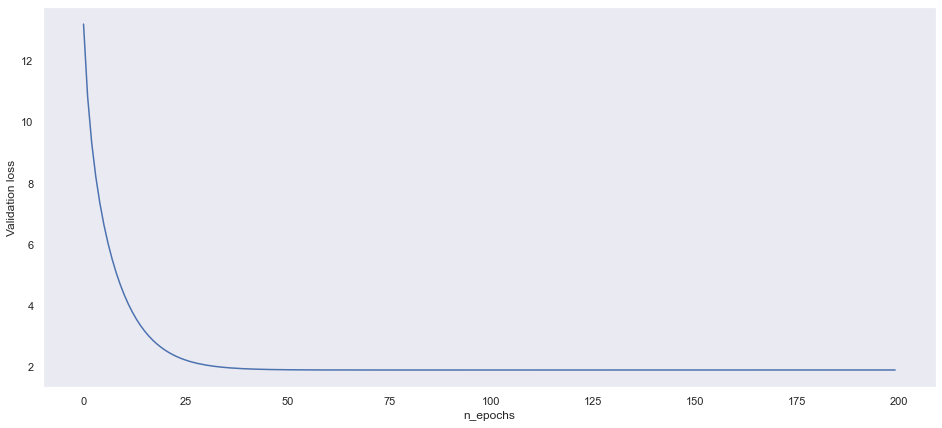

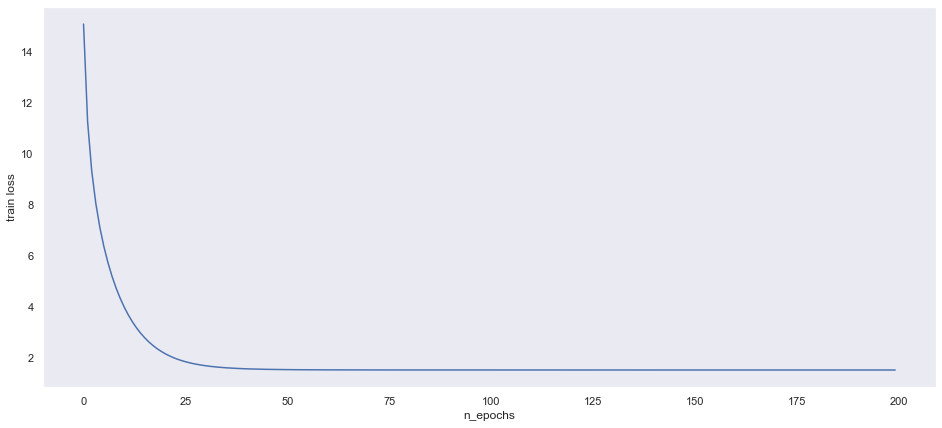

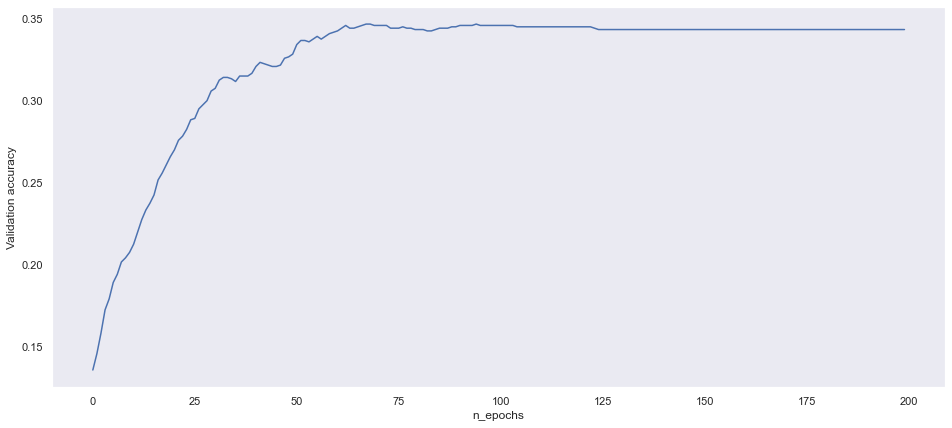

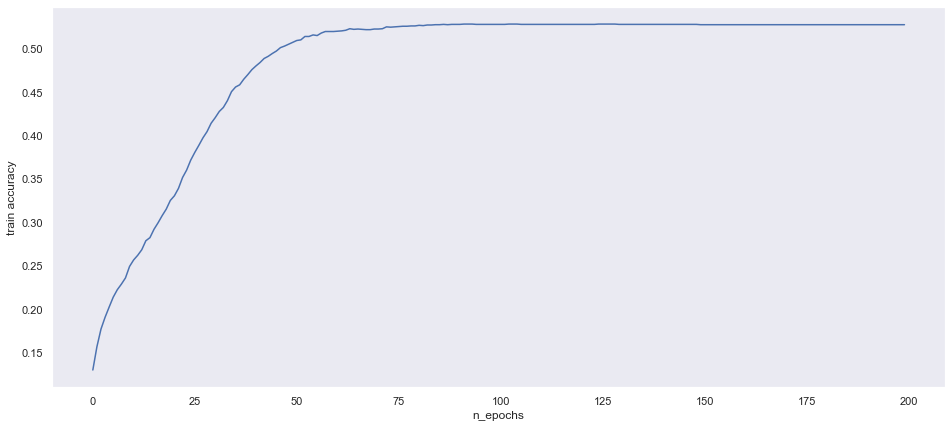

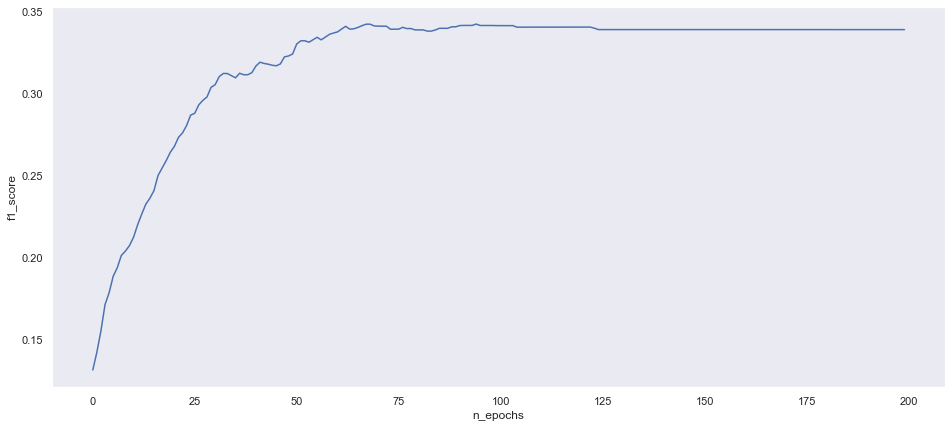

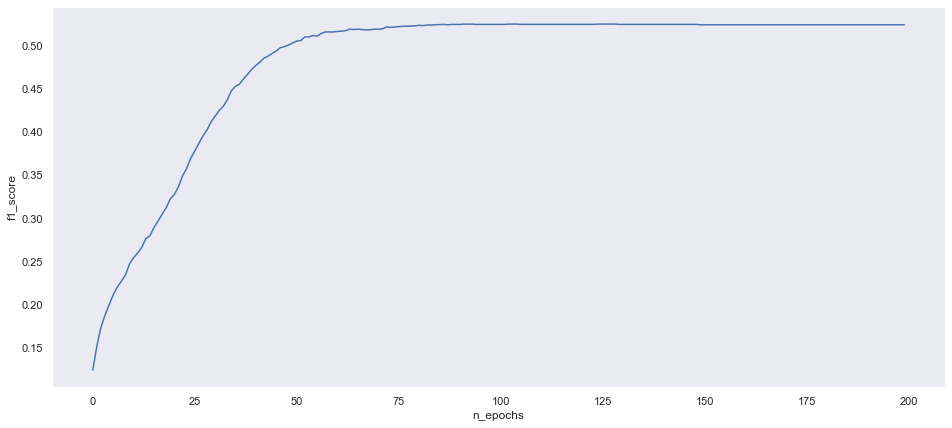

In [25]:
######################################################################
##      Plot train and validation loss, accuracy and f1 graphs      ##
######################################################################
import seaborn as sns
plt.figure(figsize=(16, 7))
sns.set(style='dark',)
ax = sns.lineplot(x=list(range(n_epochs)), y=list(val_losses))
plt.xlabel("n_epochs")
plt.ylabel("Validation loss")
plt.figure(figsize=(16, 7))
sns.set(style='dark',)
ax = sns.lineplot(x=list(range(n_epochs)), y=list(train_losses))
plt.xlabel("n_epochs")
plt.ylabel("train loss")
plt.show()

plt.figure(figsize=(16, 7))
sns.set(style='dark',)
ax = sns.lineplot(x=list(range(n_epochs)), y=list(val_accs))
plt.xlabel("n_epochs")
plt.ylabel("Validation accuracy")

plt.figure(figsize=(16, 7))
sns.set(style='dark',)
ax = sns.lineplot(x=list(range(n_epochs)), y=list(train_accs))
plt.xlabel("n_epochs")
plt.ylabel("train accuracy")
plt.show()

plt.figure(figsize=(16, 7))
sns.set(style='dark',)
ax = sns.lineplot(x=list(range(n_epochs)), y=list( val_f1))
plt.xlabel("n_epochs")
plt.ylabel("f1_score")



plt.figure(figsize=(16, 7))
sns.set(style='dark',)
ax = sns.lineplot(x=list(range(n_epochs)), y=list( train_f1))
plt.xlabel("n_epochs")
plt.ylabel("f1_score")
plt.show()

In [26]:
############################################################
##                  Test your best model                  ##
##          Report loss, accuracy and f1 metrics          ##
##      Also plot the confusion matrix for test data      ##
############################################################
total_loss = 0
N = 0
confusion = np.zeros((10, 10))
with tqdm.tqdm(enumerate(test_sampler), total=len(test_sampler)) as pbar:
    for i, (x, y) in pbar:
        #################################
        ##          Your Code          ##
        #################################
        mf = best_model._forward(x)
        total_loss+=x.shape[0]*criterion._forward(mf, y )
        update_confusion_matrix(confusion , np.argmax(mf,axis=1) , y)
        acc = sum(confusion.diagonal())/np.sum(confusion)
        f1 = f1_score(confusion)
        N+=x.shape[0]
        pbar.set_description(f'Test  | Loss:{total_loss/N:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|')

Test  | Loss:1.84e+00 | Acc: 0.38| F1: 0.38|: 100%|███████████████████████████████████| 10/10 [00:00<00:00, 137.69it/s]


## Weights Visualization (5 Points)

For the last part we want to visualize weights matrix of the first layer.

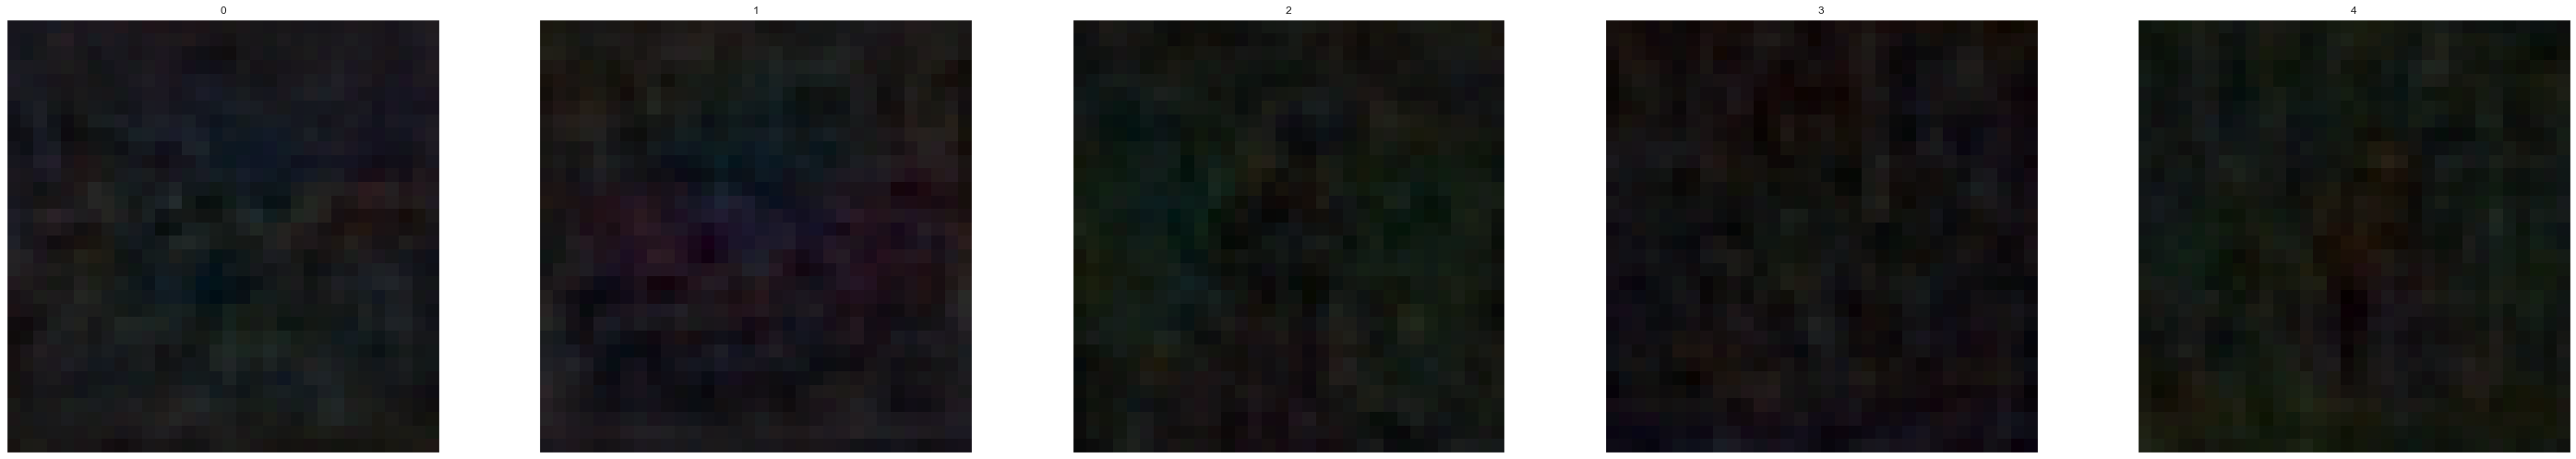

In [49]:
##########################################################
##          Visualize n of first layer weights          ##
##          First reshape them to (32, 32, 3)           ##
##########################################################
n = 5

fig = plt.figure(figsize=(50,50))
for i in range(n):
    www=best_model.layers[0].params["W"]
    ww=www[i,:].reshape((32,32,3))
    ww-=np.min(ww)
    img_grid = fig.add_subplot(5, 5, i+1)
    img_grid.imshow(ww)
    img_grid.set_yticks([])
    img_grid.set_xticks([])
    img_grid.set_title(str(i))

plt.show()
